In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
import math
import sys  
sys.path.insert(0, '/Documents/NeuroScience-Master/signal_processing/ex4')

import population_vector


### 1 - ROC

In [4]:
left_rate = pd.read_csv('leftRate.csv')
right_rate = pd.read_csv('rightRate.csv')
left_rate = np.array(left_rate)
right_rate = np.array(right_rate)
hist_left = np.histogram(left_rate)
hist_right = np.histogram(right_rate)
hist_left[1][1]

15.5

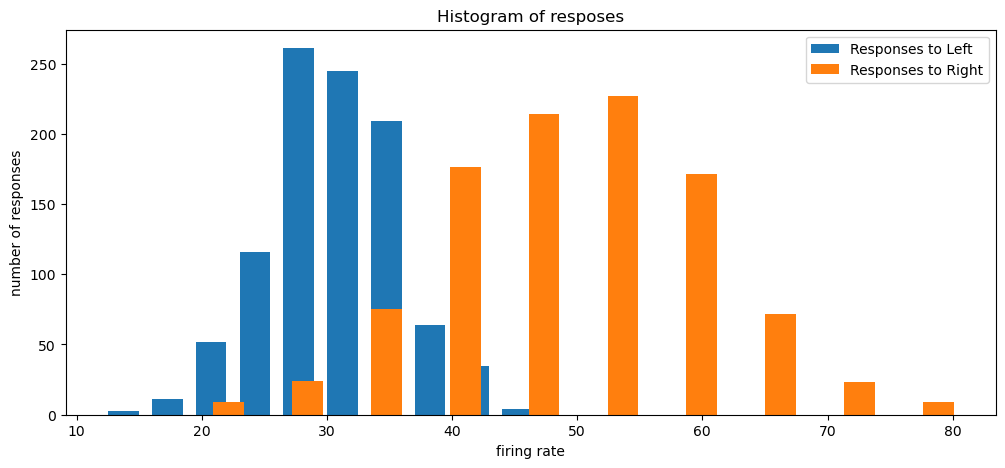

In [5]:
width = 0.7 * (hist_left[1][1] - hist_left[1][0])
fig,ax = plt.subplots(figsize=(12,5))
ax.bar((hist_left[1][:-1] + hist_left[1][1:]) / 2,hist_left[0],width,label='Responses to Left')
ax.bar((hist_right[1][:-1] + hist_right[1][1:]) / 2,hist_right[0],width,label='Responses to Right')
ax.set_xlabel('firing rate')
ax.set_ylabel('number of responses')
ax.set_title('Histogram of resposes')
ax.legend()


In [15]:
def calc_ROC(Z, H0, H1):
    FP = []
    TP = []
    limit_z = 0
    key = True
    for z in Z:
        FP.append(np.sum([rate for rate in H0 if rate >= z])/np.sum(H0))
        if (np.sum([rate for rate in H1 if rate >= z])/np.sum(H1)) < 0.8 and key:
            limit_z = z-1
            key = False
        TP.append(np.sum([rate for rate in H1 if rate >= z])/np.sum(H1))
    
    fig,ax = plt.subplots(figsize=(5,5))
    ax.plot(FP, TP, 'o-')
    ax.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1),'--',color='r')
    ax.set_xlabel('False Positive (1-specificity)')
    ax.set_ylabel('True Positive (sensitivity)')
    ax.set_title('ROC Curve')
    return limit_z

(44, 44)

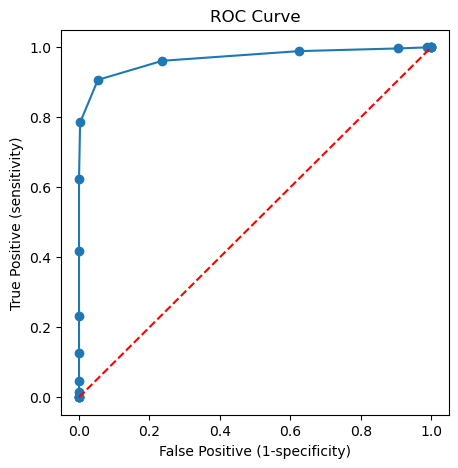

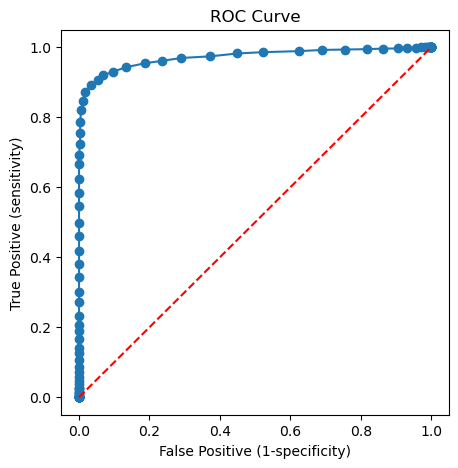

In [16]:
# definde the Z values to over on
Z1 = np.arange(0,100,5)
Z2 = np.arange(0,100)
lz1 = calc_ROC(Z1, left_rate, right_rate)
lz2 = calc_ROC(Z2, left_rate, right_rate)
lz1, lz2

In [233]:
alpha = np.sum([rate for rate in left_rate if rate >= lz1])/np.sum(left_rate)
alpha

0.006050330773578006

In [211]:
Z = np.arange(10,100,5)


sum_left_hist = np.sum(hist_left[0][:])
sum_right_hist = np.sum(hist_right[0][:])
FP = []
TP = []
for z in Z:
    temp_FP = 0
    temp_TP = 0
    for hl in hist_left[1]:
        if hl >= z:
            temp_FP += np.sum(hist_left[0][0:int(hl)])
    FP.append(temp_FP/sum_left_hist)
    for hr in hist_right[1]:
        if hr >= z:
            temp_TP += np.sum(hist_right[0][0:int(hr)])
    TP.append(temp_TP/sum_right_hist)
FP

[11.0,
 10.0,
 8.0,
 7.0,
 5.0,
 4.0,
 3.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Text(0.5, 1.0, 'ROC Curve')

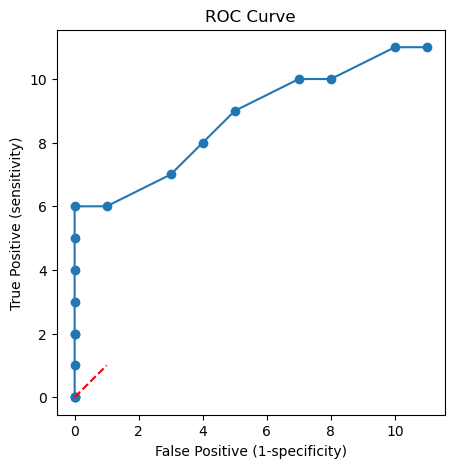

In [210]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(FP, TP, 'o-')
ax.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1),'--',color='r')
ax.set_xlabel('False Positive (1-specificity)')
ax.set_ylabel('True Positive (sensitivity)')
ax.set_title('ROC Curve')

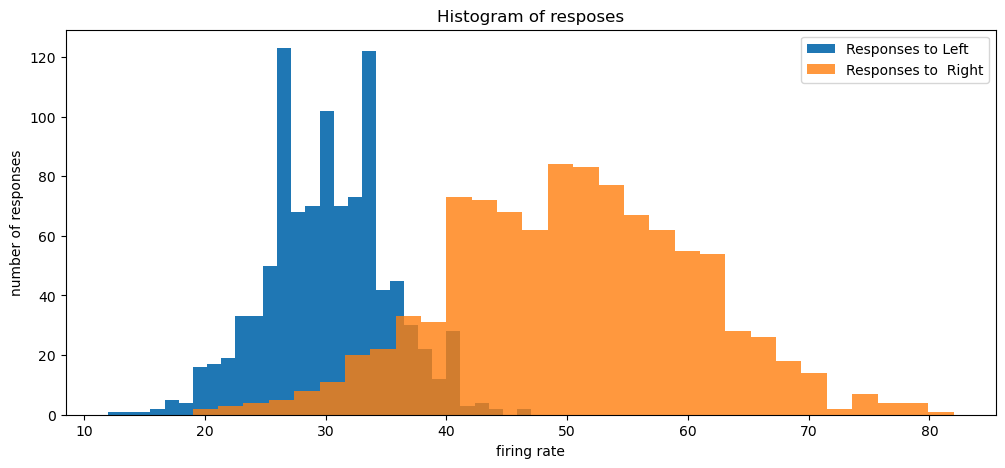

In [168]:
fig,ax = plt.subplots(figsize=(12,5))
ax.hist(left_rate, bins=30, label='Responses to Left')
ax.hist(right_rate, bins=30, alpha=0.8, label='Responses to  Right')
ax.set_xlabel('firing rate')
ax.set_ylabel('number of responses')
ax.set_title('Histogram of resposes')
ax.legend()


In [192]:
def calc_ROC(Z, H0, H1):
    FP = []
    TP = []

    for z in Z:
        FP.append(len([rate for rate in left_rate if rate >= z])/len(left_rate))
        TP.append(len([rate for rate in right_rate if rate >= z])/len(right_rate))
    
    fig,ax = plt.subplots(figsize=(5,5))
    ax.plot(FP, TP, 'o-')
    ax.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1),'--',color='r')
    ax.set_xlabel('False Positive (1-specificity)')
    ax.set_ylabel('True Positive (sensitivity)')
    ax.set_title('ROC Curve')

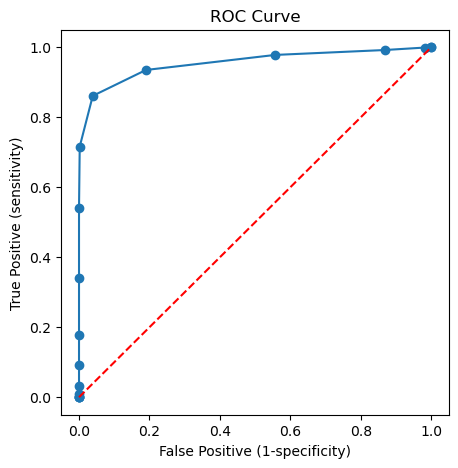

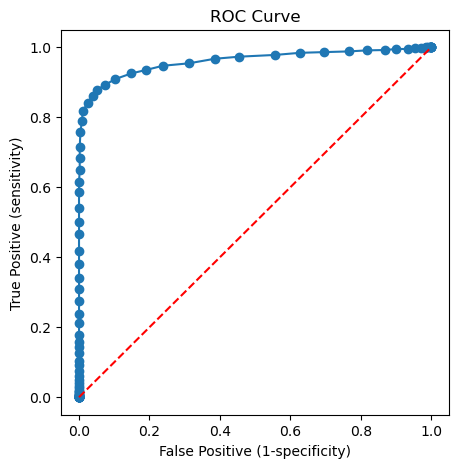

In [193]:
# definde the Z values to over on
Z1 = np.arange(10,100,5)
Z2 = np.arange(10,100,1)
calc_ROC(Z1, left_rate, right_rate)
calc_ROC(Z2, left_rate, right_rate)

### 2 - Population Vecctor

In [188]:
# implemant a function that simulate the firing rate of interneurons in teh positioning system of the cockroach
'''
Inputs:
    1. r0 - baseline firing rate
    2. n - number of interneurons
    3. alpha_i - vector of preferred angle alpha of each neuron
    4. alpha - real angle
Output: 
    1. alpha_hat - the prediction of the neurons usign population vactors
'''
def calc_prediction_angle(r0, n, list_angles, real_angle):
    list_angles = np.array(list_angles)
    
    # calculate the firing rate for each neuron
    list_ri = r0*np.cos(real_angle-list_angles)
    list_ri[list_ri<0] = 0
    
    # convert list of angels to diration vectors
    v = []
    for angle in list_angles:
        vi = [np.cos(angle),np.sin(angle)]
        v.append(vi)
    
    # since we are using cos function it's blocked, therefore the r_max = r0
    pred = np.dot(((list_ri - r0)/r0), v)
    
    # convert the radian to angle
    pred = math.atan2(pred[1],pred[0])*180/np.pi%360
    if pred < 0:
        pred = 360 + pred
    return pred

In [332]:
list_angles = [0,90,180,270]
list_angles_1 = [0,120,240]
p = population_vector.calc_prediction_angle(55,3,np.deg2rad(list_angles_1),np.deg2rad(330))
p

359.99999999999994

In [331]:
p = population_vector.calc_prediction_angle(10,4,[2*np.pi,np.pi/2,np.pi,3*np.pi/2],np.pi/6)
p

29.999999999999993

In [310]:
def calc_prediction_angle_and_ri(r0, n, list_angles, real_angle):
    list_angles = np.array(list_angles)
    
    # calculate the firing rate for each neuron
    list_ri = r0*np.cos(real_angle-list_angles)
    list_ri[list_ri<0] = 0
    
    # convert list of angels to diration vectors
    v = []
    for angle in list_angles:
        vi = [np.cos(angle),np.sin(angle)]
        v.append(vi)
    # since we are using cos function it's blocked, therefore the r_max = r0
    pred = np.dot(((list_ri - r0)/r0), v)
    
    # convert the radian to angle
    pred = round(math.atan2(pred[1],pred[0])*180/np.pi%360)
    if pred == 360:
        pred = 0

    return pred,list_ri

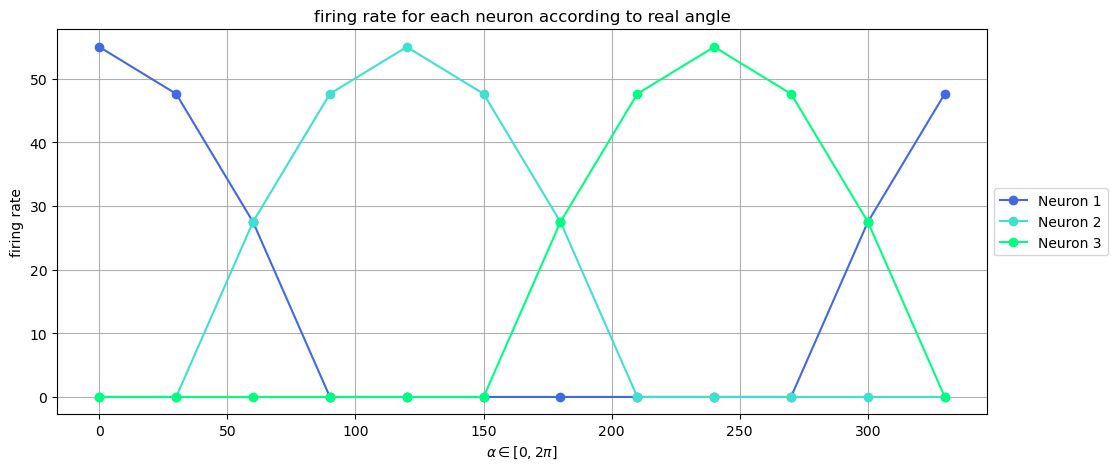

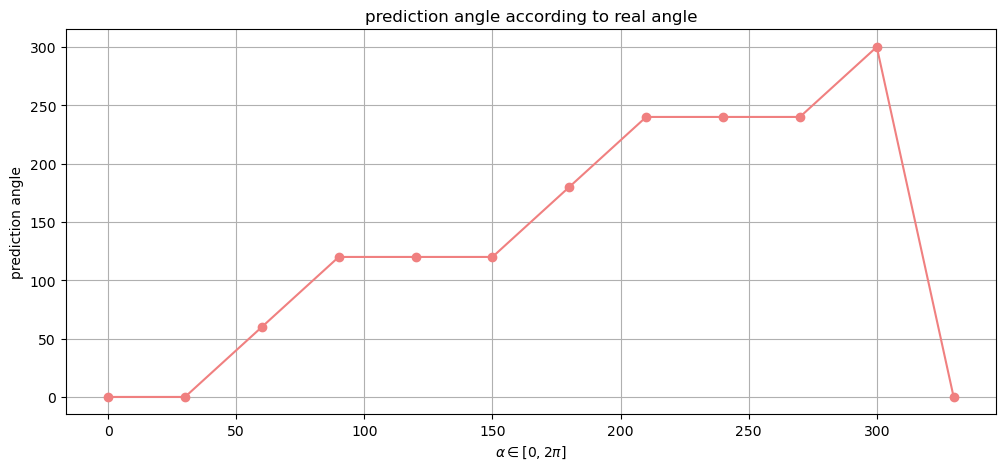

In [311]:
# alphas = [0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6,np.pi,7*np.pi/6,4*np.pi/3,3*np.pi/2,5*np.pi/3,11*np.pi/6]
alphas = [0,30,60,90,120,150,180,210,240,270,300,330]
r0 = 55
list_angles = [0,120,240]
n = 3
colors = ['black','gray','blue','cornflowerblue','cyan','turquoise',
          'springgreen','yellowgreen','yellow','orange','red','lightcoral']
list_pred = []
list_fr = []

for i,a in enumerate(alphas):
    pred,fr = calc_prediction_angle_and_ri(r0,n,np.deg2rad(list_angles),np.deg2rad(a))
    list_pred.append(pred)
    list_fr.append(fr.tolist())
fr_1 = [fr[0] for fr in list_fr]
fr_2 = [fr[1] for fr in list_fr]
fr_3 = [fr[2] for fr in list_fr]
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(alphas,fr_1, 'o-', color='royalblue', label='Neuron 1')
ax.plot(alphas,fr_2, 'o-', color='turquoise', label='Neuron 2')
ax.plot(alphas,fr_3, 'o-', color='springgreen', label='Neuron 3')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'$\alpha \in [0,2\pi]$')
ax.set_ylabel('firing rate')
ax.set_title('firing rate for each neuron according to real angle')
ax.grid()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(alphas,list_pred, 'o-', color='lightcoral')
ax.set_xlabel(r'$\alpha \in [0,2\pi]$')
ax.set_ylabel('prediction angle')
ax.set_title('prediction angle according to real angle')
ax.grid()



12


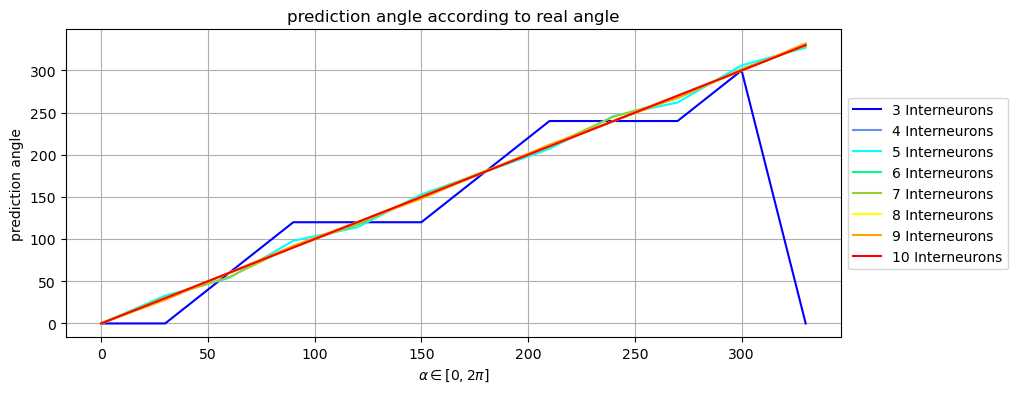

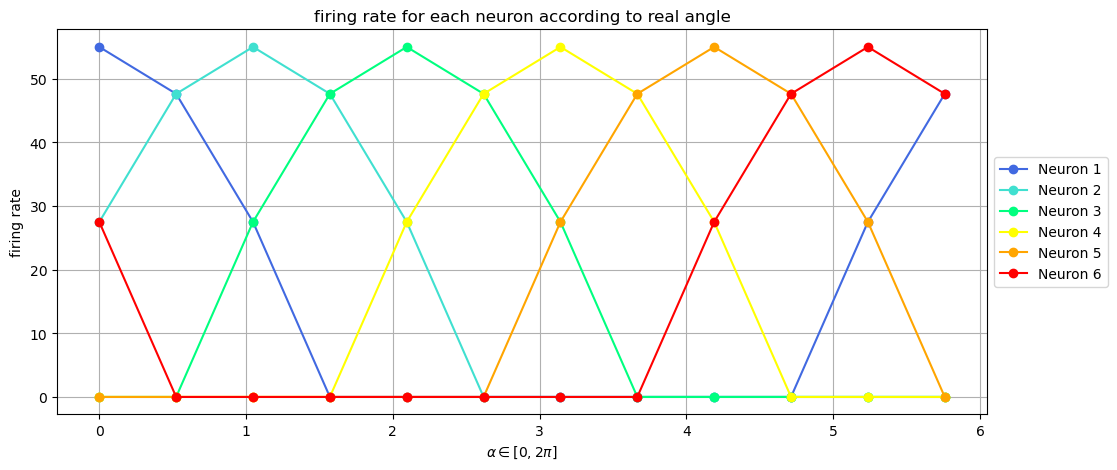

In [319]:
alphas = [0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6,np.pi,7*np.pi/6,4*np.pi/3,3*np.pi/2,5*np.pi/3,11*np.pi/6]
r0 = 55

list_angles_3 = [0,120,240]
list_angles_4 = [0,90,180,270]
list_angles_5 = [0,72,144,216,288]
list_angles_6 = [0,60,120,180,240,300]
list_angles_7 = [0,51,102,153,204,255,306]
list_angles_8 = [0,45,90,135,180,225,270,315]
list_angles_9 = [0,40,80,120,160,200,240,280,320]
list_angles_10 = [0,36,72,108,144,180,216,252,288,324]
list_of_list = [list_angles_3,list_angles_4,list_angles_5,list_angles_6,list_angles_7,
                list_angles_8,list_angles_9,list_angles_10]

colors = ['blue','cornflowerblue','cyan',
          'springgreen','yellowgreen','yellow','orange','red','lightcoral']
fig, ax = plt.subplots(figsize=(10,4))
for i,l in enumerate(list_of_list):
#     fig, ax = plt.subplots(figsize=(10,4))
    list_pred = []
    list_fr = []
    for a in alphas:
        pred,fr = calc_prediction_angle_and_ri(r0,n,np.deg2rad(l),a)
        list_pred.append(pred)
        list_fr.append(fr)
    ax.plot(np.rad2deg(alphas), list_pred, color=colors[i], label="{} Interneurons".format(len(l)))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(r'$\alpha \in [0,2\pi]$')
    ax.set_ylabel('prediction angle')
    ax.set_title('prediction angle according to real angle')
    ax.grid(linestyle='-')
list_fr = []    
for i,a in enumerate(alphas):
    pred,fr = calc_prediction_angle_and_ri(r0,10,np.deg2rad(list_angles_6),a)
    list_pred.append(pred)
    list_fr.append(fr.tolist())
fr_1 = [fr[0] for fr in list_fr]
fr_2 = [fr[1] for fr in list_fr]
fr_3 = [fr[2] for fr in list_fr]
fr_4 = [fr[3] for fr in list_fr]
fr_5 = [fr[4] for fr in list_fr]
fr_6 = [fr[5] for fr in list_fr]
# fr_7 = [fr[6] for fr in list_fr]
# fr_8 = [fr[7] for fr in list_fr]
# fr_9 = [fr[8] for fr in list_fr]
# fr_10 = [fr[9] for fr in list_fr]
print(len(fr_1))
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(alphas,fr_1, 'o-', color='royalblue', label='Neuron 1')
ax.plot(alphas,fr_2, 'o-', color='turquoise', label='Neuron 2')
ax.plot(alphas,fr_3, 'o-', color='springgreen', label='Neuron 3')
ax.plot(alphas,fr_4, 'o-', color='yellow', label='Neuron 4')
ax.plot(alphas,fr_5, 'o-', color='orange', label='Neuron 5')
ax.plot(alphas,fr_6, 'o-', color='red', label='Neuron 6')
# ax.plot(alphas,fr_7, 'o-', color='salmon', label='Neuron 7')
# ax.plot(alphas,fr_8, 'o-', color='lightcoral', label='Neuron 8')
# ax.plot(alphas,fr_9, 'o-', color='deeppink', label='Neuron 9')
# ax.plot(alphas,fr_10, 'o-', color='violet', label='Neuron 10')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'$\alpha \in [0,2\pi]$')
ax.set_ylabel('firing rate')
ax.set_title('firing rate for each neuron according to real angle')
ax.grid()


array([ 1.85808556, -2.19544386, -2.76152765,  1.75634966, -4.41472255,
        4.93354709,  0.50371082, -1.81643588,  2.32882085, -0.83473614,
        0.99778052, -7.619918  ])

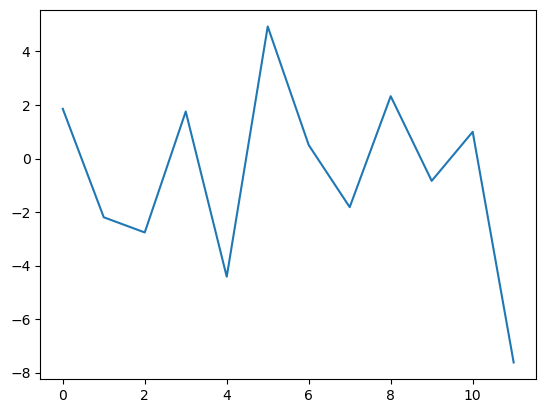

In [243]:
gs = np.random.normal(0, 4, len(alphas))
# gausi = sig.gaussian(100,4)
# plt.plot(gausi)
plt.plot(gs)
gs

In [269]:
def calc_prediction_angle_and_ri_noise(r0, n, list_angles, real_angle):
    list_angles = np.array(list_angles)
    
    # calculate the firing rate for each neuron
    gs = np.random.normal(0, 4, n)
    list_ri = r0*np.cos(real_angle-list_angles)+gs
    list_ri[list_ri<0] = 0
    
    # convert list of angels to diration vectors
    v = []
    for angle in list_angles:
        vi = [np.cos(angle),np.sin(angle)]
        v.append(vi)
    # since we are using cos function it's blocked, therefore the r_max = r0
    pred = np.dot(((list_ri - r0)/r0), v)
    
    # convert the radian to angle
    pred = round(math.atan2(pred[1],pred[0])*180/np.pi%360)
    if pred == 360:
        pred = 0

    return pred,list_ri

[0.0, 151.5361, 7963.777599999999, 46.1041, 0.0, 46.239999999999995, 8934.0304, 99.8001, 0.0, 160.2756, 13112.540100000002, 2700979643.9024997]


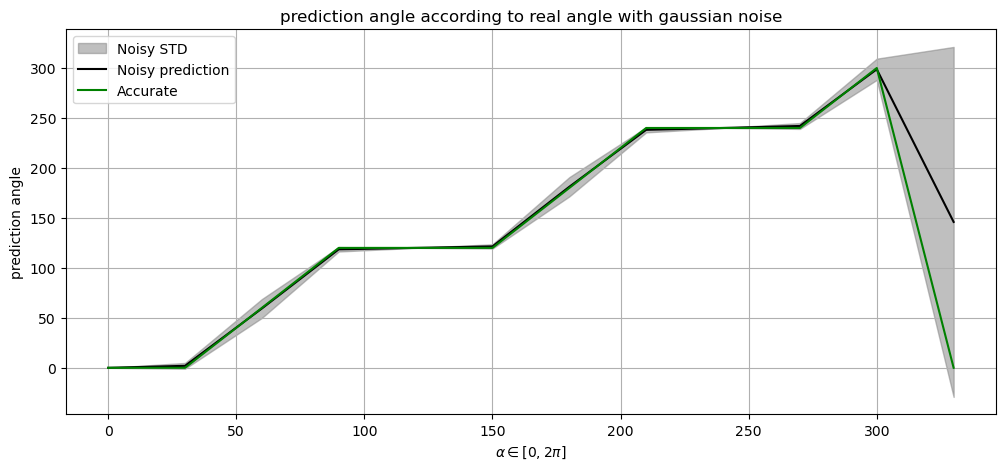

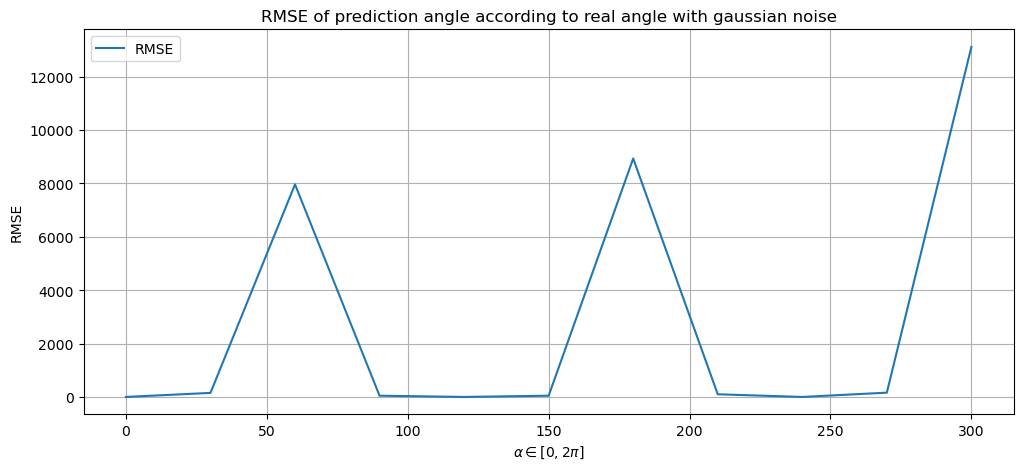

In [324]:
num_trials = 100
alphas = [0,30,60,90,120,150,180,210,240,270,300,330]
r0 = 55
list_angles = [0,120,240]
n = 3
list_pred_all = []
list_fr_all = []
ac_pred_list = []
for a in alphas:    
    ac_pred,ac_fr = calc_prediction_angle_and_ri(r0,n,np.deg2rad(list_angles),np.deg2rad(a))
    ac_pred_list.append(ac_pred)


for i in range(num_trials):
    list_pred = []
    list_fr = []
    for a in alphas:
        pred,fr = calc_prediction_angle_and_ri_noise(r0,n,np.deg2rad(list_angles),np.deg2rad(a))
        list_pred.append(pred)
        list_fr.append(fr.tolist())
    list_pred_all.append(list_pred)
    list_fr_all.append(list_fr)


means_stds_list = []
list_err = []
for i in range(len(alphas)):
    err = 0
    temp = [l[i] for l in list_pred_all]
    for j in range(num_trials):
       
        err += np.power(temp[j]- ac_pred_list[i],2)

    means_stds_list.append((np.mean(temp), np.std(temp)))
    list_err.append(np.square(err/num_trials))
means_angles = np.array([m[0] for m in means_stds_list])
std_angles = np.array([m[1] for m in means_stds_list])
print(list_err)
fig, ax = plt.subplots(figsize=(12,5))
# ax.errorbar(alphas,[m[0] for m in means_stds_list],yerr=[m[1] for m in means_stds_list], ecolor='red',label='noisy')
ax.fill_between(alphas, means_angles - std_angles, means_angles + std_angles,
                 color='gray', alpha=0.5,label='Noisy STD')
ax.plot(alphas,means_angles,color='black',label='Noisy prediction')
# ax.scatter(alphas,list_err, label='RMSE')
ax.plot(alphas,ac_pred_list,color='green',label='Accurate')
ax.set_xlabel(r'$\alpha \in [0,2\pi]$')
ax.set_ylabel('prediction angle')
ax.set_title('prediction angle according to real angle with gaussian noise')
ax.legend()
ax.grid()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(alphas[0:11],list_err[0:11], label="RMSE")
ax.set_xlabel(r'$\alpha \in [0,2\pi]$')
ax.set_ylabel('RMSE')
ax.set_title('RMSE of prediction angle according to real angle with gaussian noise')
ax.legend()
ax.grid()


In [ ]:
list_angles_3 = [0,2*np.pi/2,4*np.pi/3]

In [53]:
np.deg2rad([180,90,0])

array([3.14159265, 1.57079633, 0.        ])

In [51]:
np.pi

3.141592653589793

In [117]:
# implemant a function that simulate the firing rate of interneurons in teh positioning system of the cockroach
'''
Inputs:
    1. r0 - baseline firing rate
    2. n - number of interneurons
    3. alpha_i - vector of preferred angle alpha of each neuron
    4. alpha - real angle
Output: 
    1. alpha_hat - the prediction of the neurons usign population vactors
'''
def find_prediction(r0, num_neurons, list_alphas, alpha):
    # first I want to find for each neuron the fiting rate function
    fr = []
    print('alpha_i = ',list_alphas)
    for neuron_i in range(num_neurons):
        r_i = r0 * np.cos(alpha - list_alphas[neuron_i])
        fr.append(r_i if r_i > 0 else 0) # we are taking only positive values
    
    # calculate population vector
    print('fr = ', fr)
    fr = np.array(fr)
    r_max = np.max(fr)
    print('r_max = ', r_max)
    fr_normalized = (fr-r0)/r0
    print('normalized fr = ', fr_normalized)
    sum_deg = 0
    x_vec = [1,0] # using this vector to find the vector according to alpha_i
    x_vec = np.array(x_vec)
    print(np.cos(list_alphas))
#     population_vectors = x_vec/np.cos(list_alphas)
    
    for alpha_i, fr_i in zip(list_alphas,fr_normalized):
        sum_deg += 1/np.cos(alpha_i) * fr_i
#     alpha_hat = math.degrees(np.dot(fr_for_population, list_alphas))
    alpha_hat = sum_deg
#     alpha_hat = np.dot(fr_normalized,population_vectors)
    
    return alpha_hat


In [118]:
pred = find_prediction(1, 4, [0*np.pi/180,90*np.pi/180,180*np.pi/180,270*np.pi/180], 170)
alphas = np.arange(0,180,10)
# for alpha in alphas:
    
# pred = find_prediction(55, 3, [0,2*np.pi/3,4*np.pi/3], 60)
pred

alpha_i =  [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469]
fr =  [0.9379947521194415, 0.34664945549703535, 0, 0]
r_max =  0.9379947521194415
normalized fr =  [-0.06200525 -0.65335054 -1.         -1.        ]
[ 1.0000000e+00  6.1232340e-17 -1.0000000e+00 -1.8369702e-16]


-5226277672753313.0